# **NESTJS**

- [Cài đặt môi trường](#cài-đặt-môi-trường)  
- [Routing](#routing-get-post-put-delete)  
- [Middleware](#middleware)  
- [REQ/RES](#request--response)  
- [Tương tác DB](#tương-tác-db-database-migration)  
- [Kiến trúc mã nguồn](#kiến-trúc-mã-nguồn)  
- [Lifecycle](#lifecycle)  
- [Authen/Author](#authen-author-jwt)  
- [Exeption handle](#exception-handle)  

**NESTJS**: Framework xây dựng ứng dụng phía máy chủ dựa trên nodejs, hỗ trợ toàn diện với typescript. Mục tiêu cung cấp kiến trúc modular, dễ quản lý, bảo trì, thử nghiệm và mở rộng.  

### **CÀI ĐẶT MÔI TRƯỜNG**
*Cài đặt môi trương nestjs với cli*
```cmd
$ npm i -g @nestjs/cli
$ nest new project-name
$ npm run start
```
*Ứng dụng mặc định triển khai chạy trên cổng 3000*  
**MÔ HÌNH**  
- NestJS dựa trên expressjs, nên mọi kỹ thuật áp dứng mô hình MVC đều phù hợp với nest.
    - **M** *Model* : Dữ liệu, logic tổ chức dữ liệu nghiệp vụ: `Entity`, `Schema`, `Service`,... 
    - **V** *View*: Giao diện người dùng (Không trực tiếp trong nest - do REST API trả về json)
    - **C** *Controler*: Xử lý logic, trả về kết quả : `@Controler()` 
- NestJS thể hiện rõ hơn mô hình **Modular Serviced-based**:
    - Module: Tổ chức mã nguồn phân chia theo module các tác vụ, tính năng tương ứng. Các module là độc lập, tự quản lý.
    - Controller: Tiếp nhận request, định nghĩa endpoint.
    - Service: Xử lý logic nghiệp vụ các request.
- Tổ chức mô hình trong nest: 
    - `controller/`: Định tuyến request
    -  Service: Logic xử lý 
    -  Entity/ Model: Thao tác lên DB, mỗi model có: Entity + Service + DTO, cung cấp khả năng mở rộng linh hoạt.

    *Minh hoạ tổ chức file 1 module - user*  
    src/  
    ┣ users/  
    ┃ ┣ dto/  
    ┃ ┃  ┣ create-user.dto.ts     
    ┃ ┃  ┣ delete-user.dto.ts    
    ┃ ┃  ┗ ...   
    ┃ ┣ users.module.ts  
    ┃ ┣ users.controller.ts  
    ┃ ┣ users.service.ts  
    ┃ ┗ user.schema.ts  
    ┗ ....


**CÁC THÀNH PHẦN**  
- **Routing**: (Định tuyến) - Cơ chế ánh xạ các URL lên các hàm xử lý phía máy chủ. KHi trình duyệt gửi req thông qua url, Nestjs định tuyến request đố đến 1 controler tương ứng với url nhận được.
- **Middleware**: (Trung gian) - Xử lý trước khi đưa req vào controller.  
- **Request/Response**: Các object yêu cầu/trả về giao tiếp giữa client và máy chủ  
- **Provider & Dependency Injection**: 
    - **Provider**: Các class đều có khả ăng inject như service  
    - **DI**: Các Constructor tự động đượ inject thông qua metadata
- **DTO** (Data Transfer Object): Định nghĩa cấu trúc dữ liệu **gửi vào** trong params để thực hiện.  
- **Guard**: Quyết định có cho phép request tiếp tục thực hiện hay không.  

**Quy trình**  
```ts
// src/main.ts
// Tạo instance của ứng dụng nestjs dựa trên appmodule (module gốc)
const app = await NestFactory.create(AppModule);
await app.listen(PORT);
// app.module.ts
// Đăng ký: controler, provider
@Module({
  imports: [],
  controllers: [AppController],
  providers: [AppService],
})
export class AppModule {}
// app.controller.ts 
@Controller() // không có tham số - Controller gốc
export class AppController {
  constructor(private readonly appService: AppService) {}

  @Get()
  getHello(): string {
    return this.appService.getHello();
  }
}

```  
Khi api được gọi `GET http://localhost:3000/`,  
AppControler - định nghĩa trống `@Controller()` tìm kiếm ánh xạ đến `@Get`,  
Controller gọi tiếp đến `getHello()` trong appService

### **ROUTING (GET, POST, PUT, DELETE)**  
Tạo module user: controller, service, dto,..  
Cú pháp: 
```sh
nest g module user
nest g controller user
nest g service user

```


*Bảng annotation*  
| Annotation  | HTTP Method | Ý nghĩa                           | Ví dụ endpoint                    |
| ----------- | ----------- | --------------------------------- | --------------------------------- |
| `@Get()`    | GET         | Lấy dữ liệu                       | `@Get('users')` → `/users`        |
| `@Post()`   | POST        | Tạo mới dữ liệu                   | `@Post('create')` → `/create`     |
| `@Put()`    | PUT         | Cập nhật toàn bộ tài nguyên       | `@Put('user/:id')` → `/user/1`    |
| `@Patch()`  | PATCH       | Cập nhật một phần tài nguyên      | `@Patch('user')` → `/user`        |
| `@Delete()` | DELETE      | Xoá tài nguyên                    | `@Delete('user/:id')` → `/user/1` |


Kết hợp với controller để tạo thành endpoint hoàn chính: "user/create"  
*Decorator lấy dữ liệu từ request*  
| Decorator      | Lấy dữ liệu từ…                     | Cách sử dụng                           |
| -------------- | ----------------------------------- | -------------------------------------- |
| `@Body()`      | Body của request (POST, PUT, PATCH) | `create(@Body() dto: CreateUserDto)`   |
| `@Param()`     | URL params (`:id`, `:name`,...)     | `get(@Param('id') id: string)`         |
| `@Query()`     | Query string (`?name=value`)        | `get(@Query('name') name: string)`     |
| `@Headers()`   | Header trong request                | `get(@Headers('authorization') token)` |
| `@Ip()`        | Lấy địa chỉ IP của client           | `log(@Ip() clientIp)`                  |
| `@HostParam()` | Lấy tham số host trong subdomain    | `get(@HostParam('account') account)`   | 

*Minh hoạ* 
```ts
@Controller('user')
export class UserController {
    constructor(private userService: UserService) { }

    // ... /user
    @Post()
    create(@Body() createUserDto: CreateUserDto) {
        const res: UserSchema | "error" = this.userService.createNewUser(createUserDto);
        return res
    }

    // ... /user/get-by-name?name=
    @Get('get-by-name')
    getUserByName(@Query('name') name: string): UserSchema {
        return this.userService.getUserByName(name);
    }
}
```


### **MIDDLEWARE**
Middleware là hàm gọi trước khi bắt đầu thực thi route. Middlware function có quyền truy cập vào đối tượng Request và Response. Tương đương với express middleware.  
Mục tiêu sử dụng:
*Mục đích tiền xử lý logic chung cho req , giống việc thực hiện trước khi vào thực hiện trong controller, như:*  
- Authentication: Mục đích kiểm tra access token, API key, session trước khi cho phép truy cập vào controller.
- Authorization: Phân quyền của user, để xem quyền truy cập route của người gửi req.
- Logging: Debug, ghi dấu, theo dõi hoạt động gọi api của người dùng. 
- Thêm header (gắn header cho res), xử lý bảo mật (cors, )

*Tạo middleware logger* 
```sh
nest g middleware logger
```
Middleware là một Injectable, nên có thể truyền service,... vào thông qua `constructor`.
```ts
// src/logger/loger.middleware.ts
import { Injectable, NestMiddleware } from '@nestjs/common';
import { Request, Response, NextFunction } from 'express';

@Injectable()
export class LoggerMiddleware implements NestMiddleware {
  use(req: Request, res: Response, next: NextFunction) {

    console.log(`[Log] ${req.method} - ${req.originalUrl}`)

    next(); // gọi đến middleware tiếp theo hoặc controler
  }
}


```
*Triển khai middleware trong module user cho từng request*
```ts
// src/app.module.ts
  configure(consumer: MiddlewareConsumer) {
    consumer
      .apply(LoggerMiddleware)
      .forRoutes({
        path:'user'
        method: [RequestMethod.GET]
        })
  }
```
| Cú pháp trong path          | Khớp                                   |
| ---------------- | --------------------------------------------- |
| `'abc/*splat'`   | `/abc/xyz`, `/abc/123`                        |
| `'abc/{*splat}'` | `/abc`, `/abc/xyz`, `/abc/1/2`                |


### **REQUEST / RESPONSE**
*Đối tượng request, response trong **Express***  - adapter mặc định của nest. Cho phép đọc thông tin của Req, res.
Khi một request được gửi đến từ client, Nest tạo đối tượng Request và Res. Mỗi middle ware có quyền cho phép request đi tiếp, hoặc gửi luôn response tại đó.

*Minh hoạ sử dụng req, res trong middleware*
```tsC
use(req: Request, res: Response, next: NextFunction) {
  if (!req.headers.authorization) {
    return res.status(401).json({ message: 'Unauthorized' });
  }

  next(); // Cho phép đi tiếp nếu hợp lệ
}
```

*Minh hoạ sử dụng `@Res` trong controller*
```ts
// Sử dụng @Res() trong controller 
// Không sử dụng return + tự định nghĩa response
@Get()
getUser(@Res() res: Response) {
    res.status(200).json({
        // response object
    })
}

```

### **TƯƠNG TÁC DB, DATABASE MIGRATION**  
**DATABASE**: `src/database/`  

**DATABASE MIGRATION**: Quá trình quản lý thay đổi **cấu trúc** cơ sở dữ liệu (tức Cấu trúc của **Schema**) theo từng phiên bản của phần mềm, mỗi thay đổi đều được ghi nhận lại thành 1 file migration, nhằm:
- Theo dõi, phiên bản hoá các thay đổi cơ sở dữ liệu
- Tự động hoá việc tạo, cập nhật CSDL
- Đồng bộ môi trường.  

Migration bao gồm các thao tác như: Thêm cột mới, thêm bảng mới, đổi kiểu dữ liệu cột,...  
*Khác biệt với InjectRepository*
|                        | InjectRepository | Migration                         |
| ---------------------- | ---------------- | --------------------------------- |
| Mục đích               | CRUD dữ liệu     | Thay đổi cấu trúc DB              |
| Ghi lại lịch sử        | Không            | Có                                |
| Rollback được không?   | Không            | Có (qua `down()` method)          |
| Dùng ở production?     | Có               | Bắt buộc nên dùng                 |
| Dễ gây lỗi production? | Không            | Ít hơn nếu k dùng `synchronize` |


**Nest+TypeORM -- Entity**: Class Typescript đại diện cho bảng trong cơ sở dữ liệu, mô tả schema ở cấp độ code, không tự động tạo bảng, cột trong DB khi `synchronize: false`.
**Migration**: File ghi lại thay đối cấu trúc databse, là cầu nối giữa Entity và DB thật. Thư mục:`src/database/migrations/`

```ts
//src/database/data-source.ts
import 'dotenv/config'; 
import { User } from '../user/user.entity';
import { DataSource } from 'typeorm';

export const AppDataSource = new DataSource({
    type: 'mysql',
    host: process.env.DB_HOST,
    port: parseInt(process.env.DB_PORT),
    username: process.env.DB_USERNAME,
    password: process.env.DB_PASSWORD,
    database: process.env.DB_NAME,
  
    entities: [User],
    // Thư mục lưu các file migrations đã tạo
    migrations: ['src/database/migrations/*.ts'],
    synchronize: false,
});
```
*Lệnh tạo file migrations: Theo dõi Entity - Database và thực hiện tạo migration phù hợp.*  
`npx typeorm-ts-node-commonjs migration:generate src/database/migrations/SchemaUpdate -d src/database/data-source.ts`  
*Chạy migrartion*  
`npx typeorm-ts-node-commonjs migration:run -d src/database/data-source.ts`  

| thành phần | ý nghĩa |
| ---- | ---- |
| `npx` | công cụ package npm |
| `typeorm-ts-node-commonjs` | CLI wrapper của typeORM, typescript , commonjs |
| `migration:generate` | Lệnh typeOrm tự động tạo file migration | 
| `migration:run` | So sánh với bảng migrations trong database, thực thi các file migration phù hợp | 
| `src/database/migrations/SchemaUpdate` | Đường dẫn tạo file Migration kèm tên file |
| `-d src/database/data-source.ts` | Trỏ tới cấu hình data source thực tế được lưu trữ của ứng dụng |


*Bảng migration được lưu trữ trong database*  
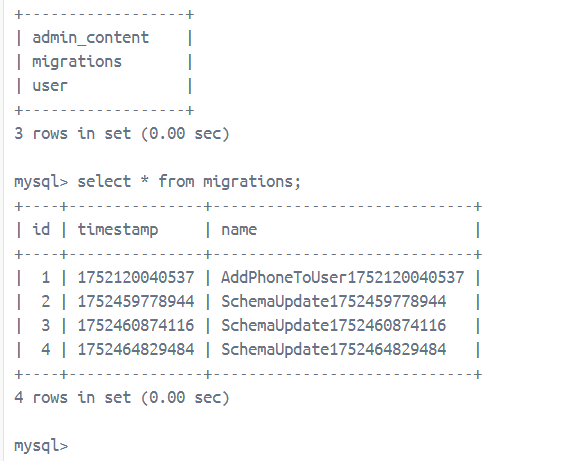
---
*Khác: Configuration trong nest* 
`$ npm i --save @nestjs/config`  
*Thiết lập configuration cho toàn bộ ứng dụng*  
```ts
import { Module } from '@nestjs/common';
import { ConfigModule } from '@nestjs/config';

@Module({
  imports: [ConfigModule.forRoot()],
})
export class AppModule {}
```
**SQL TypeORM**: *Typescript Object Realational Mapper (ORM)*  
`npm i --save typeorm mysql2`  
*Thiết lập kết nối db sử dụng TypeOrm trực tiếp trong app.module.ts,  
kết hợp configuration*
```ts
// src/app.module.ts
import { TypeOrmModule } from '@nestjs/typeorm';
import { User } from './user/user.entity';
import { ConfigModule, ConfigService } from '@nestjs/config';

@Module({
  imports: [
    ConfigModule.forRoot({
      isGlobal: true,
    }),
    TypeOrmModule.forRootAsync({
      inject: [ConfigService],
      useFactory: (config: ConfigService) => ({
        type: 'mysql',
        host: 'localhost',
        port: 3306,
        username: config.get<string>('DB_USERNAME'),
        password: config.get<string>('DB_PASSWORD'),
        database: 'nestdb',
        entities: [User],
        synchronize: true,
      }),
    }),
    UserModule],
  controllers: [AppController],
  providers: [AppService],
})
export class AppModule{}
```


### **KIẾN TRÚC MÃ NGUỒN**  
*Tổ chức thư mục nest*  
```css
nest/  
│  
├── test/                           # Thư mục kiểm thử toàn bộ luồng, E2E testing  
│   └── ...                         # Được tạo mặc định bởi nestcli  
│  
├── src/  
│   ├── config/                     # Thư mục cấu hình chung  
│   │   ├ configuaration.ts  
│   │   └ validation.ts  
│   │  
│   ├── database/  
│   │   ├ migrations/               # Lưu trữ file migration  
│   │   ├ database.config.ts  
│   │   ├ database.provider.ts  
│   │   └ data-source.ts  
│   │  
│   ├── user/                       # Module user  
│   │   ├ dto/                      # dto cho các req của module user  
│   │   ├ user.module.ts  
│   │   ├ user.controller.ts  
│   │   ├ user.service.ts  
│   │   └ user.entity.ts  
│   ├── ...                         # Các Module khác  
│   │  
│   ├── shared/                     # Lưu trữ các thành phần tái sử dụng,  
|   |                               # tài nguyên dùng chung  
│   ├── common/                     # Pipe, Guards, Intercepters, Filter....  
│   │   ├ pipes/  
│   │   ├ guards/  
│   │   ├ filters/  
│   │   └ intercepters/  
│   │  
│   ├── app.module.ts               # Module chính  
│   └── main.ts  
│  
├── index.html  
├── .env  
├── nest-cli.json  
├── tsconfig.json  
├── vite.config.ts  
└── package.json  
```

*Luồng xử lý 1 http request*   
```css
Request  
→ Middleware            // can thiệp sớm vào request (log, parse, auth sơ bộ)  
→ Guard                 // kiểm tra quyền truy cập (auth, role, ACL)  
→ Interceptor (before)  // xử lý logic trước controller (transform, log, timeout)  
→ Pipe                  // validate và chuyển đổi dữ liệu đầu vào  
→ Controller            // nhận request và điều phối logic  
→ Service               // xử lý business logic chính  
→ Interceptor (after)   // can thiệp sau xử lý (modify response, logging)  
→ Response              // trả kết quả về client  
```


### **LIFECYCLE**  
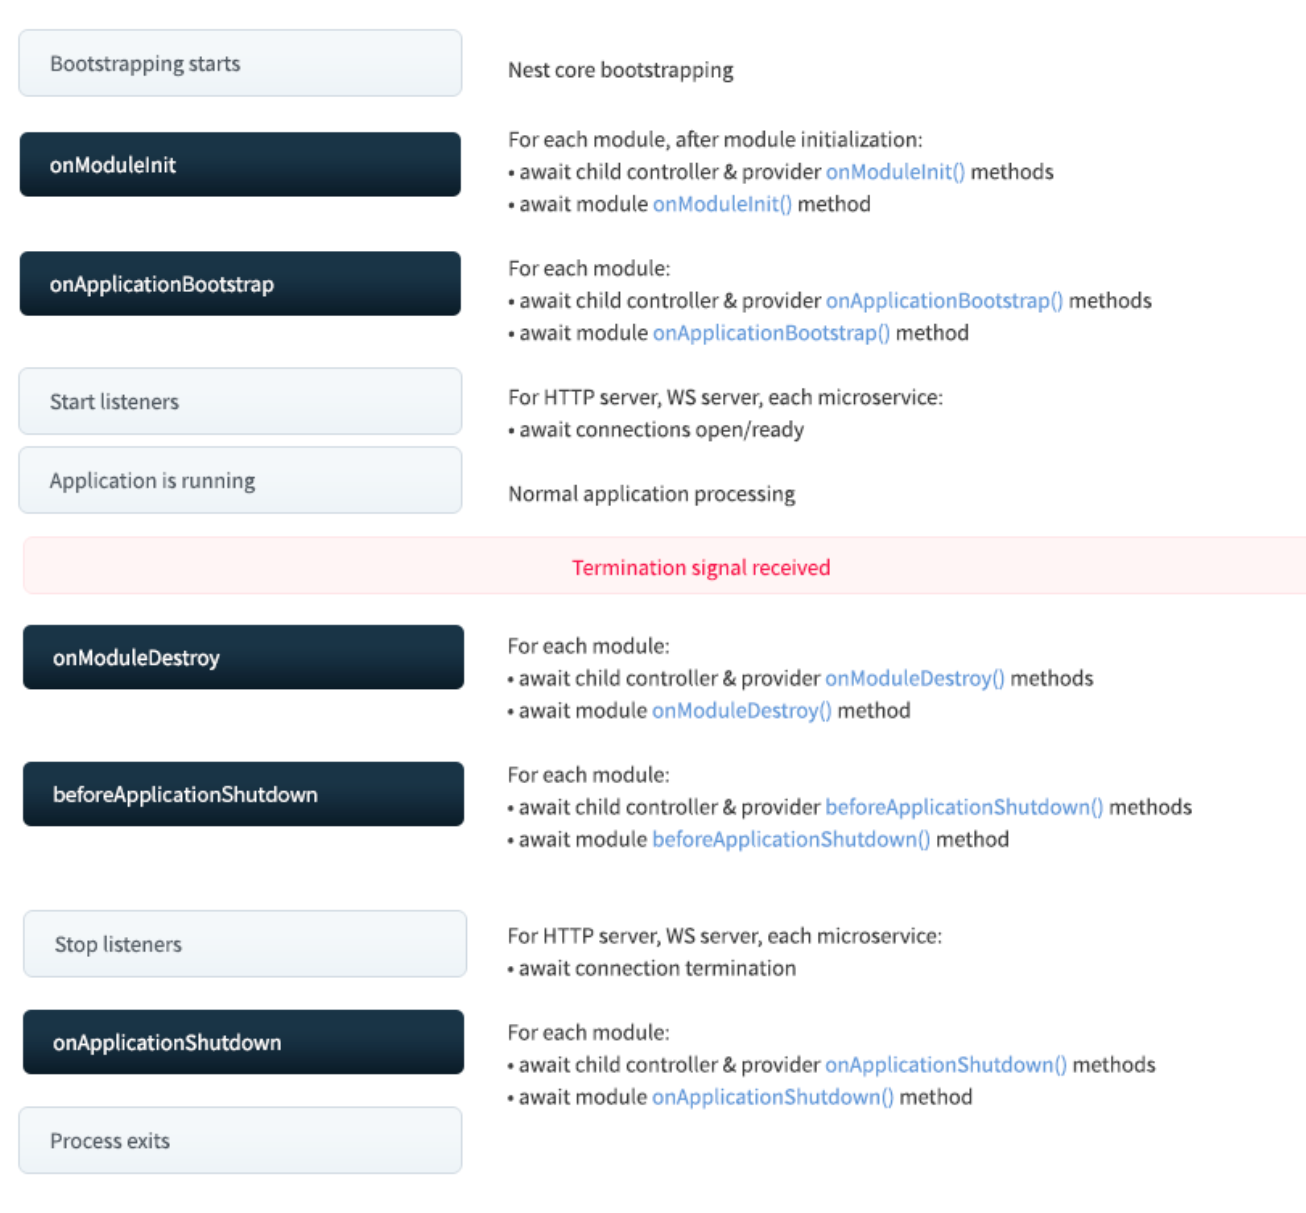  
Appmodule được chạy và khởi tạo toàn bộ module của ứng dụng trong main.ts
```ts
import { NestFactory } from '@nestjs/core';
import { AppModule } from './app.module';

async function bootstrap() {
  const app = await NestFactory.create(AppModule);

  const PORT = process.env.PORT ?? 3000;
  await app.listen(PORT);
}
bootstrap();
```
**LifeCycle hooks trong nestjs**  
| **Hook**                      | **Interface**               | **Thời điểm được gọi**                                                                | **Áp dụng**                             |
| ----------------------------- | --------------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------- |
| `onModuleInit()`              | `OnModuleInit`              | Sau khi module hiện tại và tất cả các dependency của nó được khởi tạo                 | `@Injectable()` service hoặc controller |
| `onApplicationBootstrap()`    | `OnApplicationBootstrap`    | Sau khi toàn bộ ứng dụng được bootstrap (tức là tất cả modules đã được khởi tạo xong) | service hoặc module cấp cao             |
| `afterInit(server: any)`      | `OnGatewayInit`             | Sau khi WebSocket Gateway được khởi tạo                                               | Chỉ dùng cho `@WebSocketGateway()`          |
| `onModuleDestroy()`           | `OnModuleDestroy`           | Khi module hiện tại bị huỷ (trong quá trình shutdown của app)                         | Service/module được quản lý bởi DI          |
| `beforeApplicationShutdown()` | `BeforeApplicationShutdown` | Trước khi ứng dụng bắt đầu quá trình shutdown (có thể dùng cho cleanup)               | Mọi `@Injectable()`                         |
| `onApplicationShutdown()`     | `OnApplicationShutdown`     | Khi ứng dụng shutdown (sau `beforeApplicationShutdown`)                               | Mọi `@Injectable()`                         |

*note: onModuleDestroy,beforeApplicationShutdown,OnApplicationShutdown cần có app.enableShutdownHooks(); trong main.ts. Tiêu tốn tài nguyên hệ thống, nên bị tắt theo mặc định*
```sh
# Tín hiệu khi tắt SIGINT: Ngắt terminal
server is running on port 3000
Application shutdown SIGINT
^C
Terminate batch job (Y/N)? 
```

### **AUTHENTICATION / AUTHORIZATION (JWT)**
**JWT** (Json web token): Tiêu chuẩn truyền tải thông tin an toàn giữa các bên dạng đối tượng json.  
Hoạt động: JWT được gửi trả về client, bất cứ khi nào client muốn truy cập route hoặc resource được bảo vệ, cần thêm JWT vào header với nội dung:
Authorization: Bearer <`token`>. KHi đó, máy chủ kiểm tra tính hợp lệ của JWT được gửi trong header mỗi khi nhận req.  
JWT đảm bảo được các nguyên tắc bảo mật:  
- **Toàn vẹn**: Dữ liệu trong JWT không thể bị sửa đổi mà không bị phát hiện, nhờ chữ ký cuối token.
- **Xác thực**: Đảm bảo xác minh danh tính người dùng nhờ các thông tin trong payload.

=> Sử dụng để xác minh danh tính người gửi cho từng req tới.    


**Authentication**: Xác thực ai đang đăng nhập ?
- Đăng nhập: Kiểm tra thông tin đăng nhập
- Tạo JWT: Sinh access_token chứa thông tin user trong payload, khi đăng nhập thành công, trả về token này cho client.

**Authorization**: Phân quyền, có quyền gì ? 
- Xác minh JWT: Kiểm tra tính hợp lệ của JWT
- Giải mã JWT: Lấy thông tin người gửi từ JWT payload
- Kiểm tra quyền: Xác định quyền và giới hạn truy cập tài nguyên tương ứng.

**DEMO Minh hoạ**
- Triển khai module auth xác thực đăng nhập bằng phone, password
- Trả về acccess_token nếu đăng nhập thành công.
- Xác thực quyền khi truy cập dữ liệu route admin/get-content (yêu cầu role:'admin') thông qua jwt gửi trong req. Chặn truy cập controller nếu không có role 'admin'.

### **EXCEPTION HANDLE**  
Exception Handling là cơ chế xử lý lỗi một cách có tổ chức và nhất quán, kiếm soát hệ thống khi có lỗi xảy ra.  
NestJs cung cấp cơ chế xử lý ngoại lệ dựa trên `@Catch()` decorator và lớp `Exception Filter`
*Bảng ngoại lệ phổ biến thường sử dụng*  
| Ngoại lệ (Class)                | Mã HTTP | Ý nghĩa / Tình huống sử dụng                                                     |
| ------------------------------- | ------- | -------------------------------------------------------------------------------- |
| `BadRequestException`           | 400     | Dữ liệu đầu vào không hợp lệ (validation, parse lỗi, thiếu trường)               |
| `UnauthorizedException`         | 401     | Chưa đăng nhập / token không hợp lệ                                              |
| `ForbiddenException`            | 403     | **không có quyền truy cập**                                   |
| `NotFoundException`             | 404     | Không tìm thấy tài nguyên (user, product, ...)                                   |
| `InternalServerErrorException`  | 500     | Lỗi hệ thống không xác định (exception không bắt được)                           |

```ts
// Ví dụ bắt lỗi trong hàm async.
import { Injectable, BadRequestException } from '@nestjs/common';

@Injectable()
export class UserService {
  async createUser(data: CreateUserDto): Promise<any> {
    try {
      // logic có thể gây lỗi - truy cập đến cơ sở dữ liệu
      const user = await this.userRepository.save(data);
      return user;
    } catch (error) {
      // throw exception phù hợp
      throw new BadRequestException('Cannot create user: ' + error.message);
    }
  }
}
```

*Tự cấu hinh exception trong nest*  
Yêu cầu cần có của 1 exception tự cấu hình:
- Kế thừa từ HttpException - lớp được cung cấp sẵn của Nest
- truyền đối số trong super() : body + httpStatus.
```ts
// Exception không được phép xoá người dùng khác theo tên
import { HttpException, HttpStatus } from '@nestjs/common';

export class CannotDelOther extends HttpException {
    // message là optional
    constructor(message = 'You are not allowed to delete other users') {
        super(
            // Bắt buộc gọi super với 2 đối số
            { // body
                statusCode: HttpStatus.FORBIDDEN,
                message,
                error: 'Forbidden',
            },
            // status
            HttpStatus.FORBIDDEN,
        );
    }
}

```

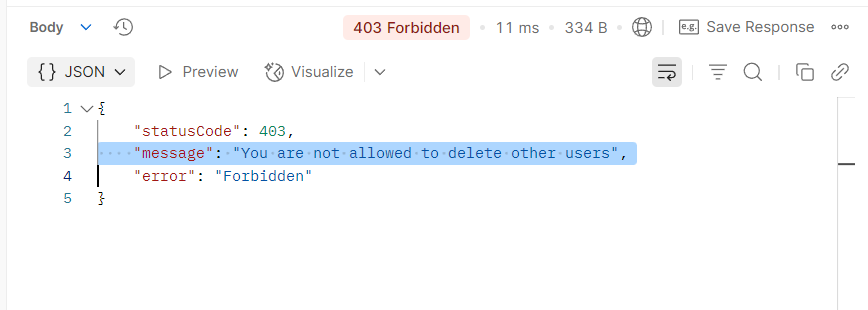

```ts
// Minh hoạ xử lý try - catch
async deleteUserByName(requestUserName: string, targetUserName: string): Promise<string> {
    if (requestUserName !== targetUserName) {
        throw new CannotDelOther(); // exception tự cấu hình
    }

    try {
        const result = await this.userRepo.delete({ name: targetUserName });

        if (result.affected === 0) {
            // Nếu không có bản ghi nào bị xóa
            throw new InternalServerErrorException(`User "${targetUserName}" not found or could not be deleted`);
        }

        return `User "${targetUserName}" deleted`;
    } catch (error) {
        throw new InternalServerErrorException('Error delete');
    }
}
```


```ts





const [users, total] = await this.userRepo.findAndCount({
  skip: 10,
  take: 10,
  order: { name: 'ASC' },
});





